In [19]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from scipy import special
import pandas as pd
from pydataset import data

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Lab 5: Introduction to Matplotlib

## Problem 1

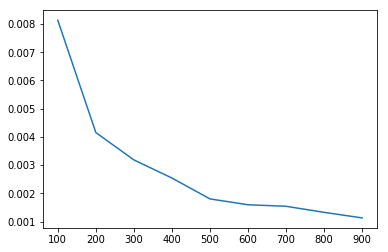

In [2]:
def problem1_1_calc(n):
    # Create an n × n array of values randomly sampled 
    # from the standard normal distribution.
    randomVals = np.random.normal(size=(n,n))
    # Compute the mean of each row of the array.
    meanRows = np.mean(randomVals, axis=1)
    # Calculate the variance of these means.
    varMeans = np.var(meanRows)
    return varMeans

def problem1_1_plot():
    n = np.arange(100, 1000, 100)
    results = np.zeros(len(n))
    for index, num in enumerate(n):
        results[index] = problem1_1_calc(int(num))
    plt.plot(n, results)
    plt.show()   
    
problem1_1_plot()

## Problem 2

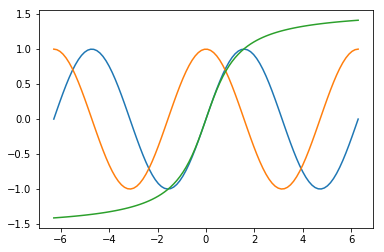

In [3]:
def problem2_1():
    domain = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    plt.plot(domain, np.sin(domain))
    plt.plot(domain, np.cos(domain))
    plt.plot(domain, np.arctan(domain))
    plt.show()
problem2_1()

## Problem 3

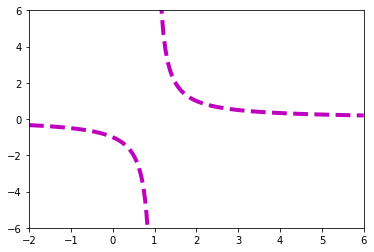

In [4]:
def problem3_1():
    # split up the domain
    domain1 = np.linspace(-2, .99, 100)
    domain2 = np.linspace(1.01, 6, 100)
    f = lambda x: (1 / (x - 1))
    plt.plot(domain1, f(domain1), "m--", linewidth=4)
    plt.plot(domain2, f(domain2), "m--", linewidth=4) 
    plt.xlim(-2,6)
    plt.ylim(-6,6)
problem3_1()

## Problem 4

In [ ]:
def problem4_1():
    
    plt.figure(figsize=(12,6))

    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
    x = np.linspace(0, 2 * np.pi, 100)
    
    axes[0,0].plot(x, np.sin(x), "g-")
    axes[0,0].set_title("$\sin(x)$")
    axes[0,1].plot(x, np.sin(2 * x), "r--")
    axes[0,1].set_title("$\sin(2x)$")
    axes[1,0].plot(x, 2 * np.sin(x), "b--")
    axes[1,0].set_title("$2\sin(x)$")
    axes[1,1].plot(x, 2 * np.sin(2 * x), "m:")
    axes[1,1].set_title("$2\sin(2x)$")
    
    plt.axis([0, 2 * np.pi, -2, 2])
    
    plt.suptitle("Trig Plots")
    plt.show()
    
problem4_1()

## Problem 5

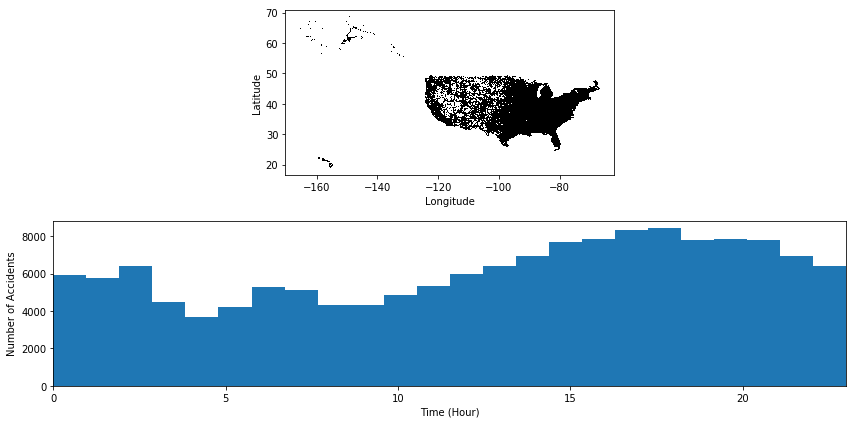

In [6]:
def problem5_1():
    data = np.load("FARS.npy")
    
    plt.figure(figsize=(12,6))

    
    ax1 = plt.subplot(211)
    ax1.plot(data[:,1], data[:,2], 'k,')
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.set_aspect("equal")
    
    ax2 = plt.subplot(212)
    ax2.hist(data[:,0], bins=24, range = [0,23])
    ax2.set_xlim(0,23)
    ax2.set_xlabel("Time (Hour)")
    ax2.set_ylabel("Number of Accidents")
    
    plt.tight_layout()
    
problem5_1()

## Problem 6

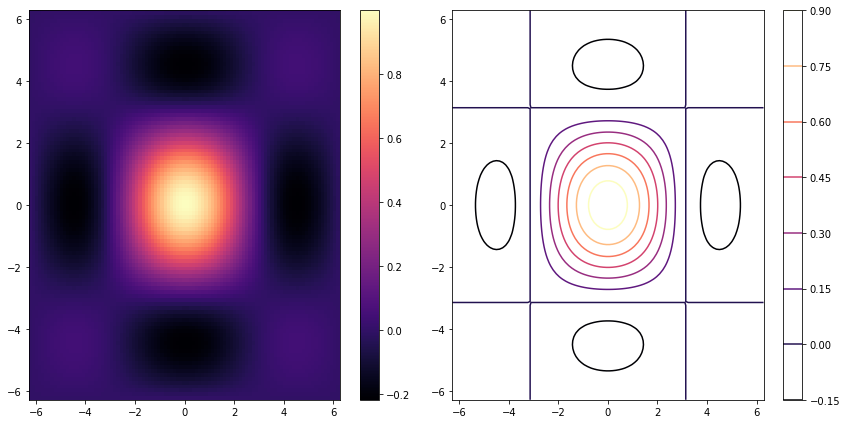

In [7]:
def problem6_1():
    plt.figure(figsize=(12,6))
        
    x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
    y = x.copy()
    X, Y = np.meshgrid(x, y)
    G = (np.sin(X) * np.sin(Y)) / (X * Y)

    # heat map of G
    plt.subplot(121)
    plt.pcolormesh(X, Y, G, cmap="magma")
    plt.colorbar()
    
    # contour map og G
    plt.subplot(122)
    plt.contour(X, Y, G, 10, cmap="magma")
    plt.colorbar()
    
    plt.axis([-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi])
    plt.tight_layout()
    
    plt.show()

problem6_1()

# Lab 9: Data Visualization

Section 1:
Mean of x: 9.0
Mean of y: 7.501
Variance of x: 10.0
Variance of y: 3.752
Slope: 0.5
Intercept: 3.0
R = 0.816

Section 2:
Mean of x: 9.0
Mean of y: 7.501
Variance of x: 10.0
Variance of y: 3.752
Slope: 0.5
Intercept: 3.001
R = 0.816

Section 3:
Mean of x: 9.0
Mean of y: 7.5
Variance of x: 10.0
Variance of y: 3.748
Slope: 0.5
Intercept: 3.002
R = 0.816

Section 4:
Mean of x: 9.0
Mean of y: 7.501
Variance of x: 10.0
Variance of y: 3.748
Slope: 0.5
Intercept: 3.002
R = 0.817


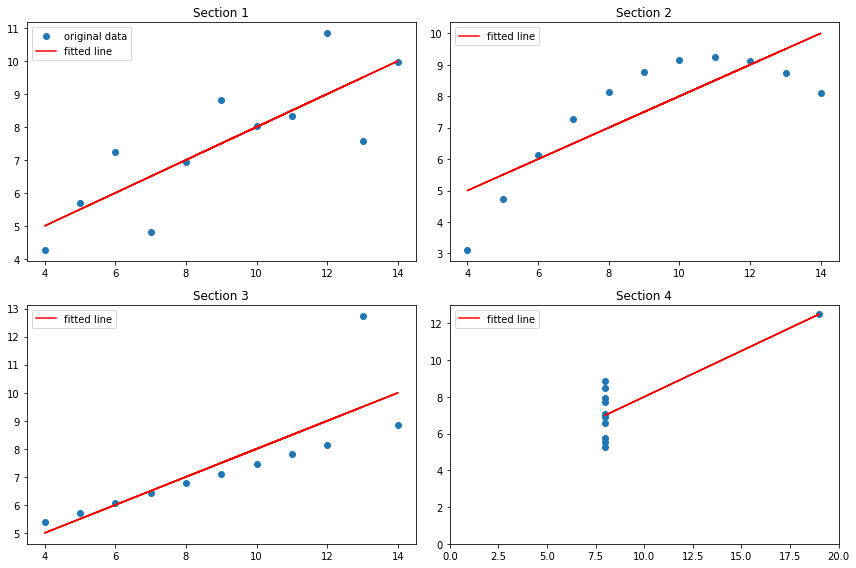

In [8]:
anscombe = np.load("anscombe.npy")

sec1, sec2, sec3, sec4 = anscombe[:,0:2], anscombe[:,2:4], anscombe[:,4:6], anscombe[:,6:8]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].plot(sec1[:,0], sec1[:,1], 'o', label='original data')
slope, intercept, r_value, p_value, std_err = stats.linregress(sec1[:,0], sec1[:,1])
print("Section 1:" + 
     "\nMean of x: " + str(np.mean(sec1[:,0])) +
     "\nMean of y: " + str(round(np.mean(sec1[:,1]),3)) +
     "\nVariance of x: " + str(np.var(sec1[:,0])) +
     "\nVariance of y: " + str(round(np.var(sec1[:,1]),3)) +
     "\nSlope: " + str(round(slope,3)) +
     "\nIntercept: " + str(round(intercept,3)) +
     "\nR = " + str(round(r_value, 3)))
axes[0,0].plot(sec1[:,0], intercept + slope*sec1[:,0], 'r', label='fitted line')
axes[0,0].legend()
axes[0,0].set_title("Section 1")
axes[0,1].plot(sec2[:,0], sec2[:,1], 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(sec2[:,0], sec2[:,1])
print("\nSection 2:" + 
     "\nMean of x: " + str(np.mean(sec2[:,0])) +
     "\nMean of y: " + str(round(np.mean(sec2[:,1]),3)) +
     "\nVariance of x: " + str(np.var(sec2[:,0])) +
     "\nVariance of y: " + str(round(np.var(sec2[:,1]),3)) +
     "\nSlope: " + str(round(slope,3)) +
     "\nIntercept: " + str(round(intercept,3)) +
     "\nR = " + str(round(r_value, 3)))
axes[0,1].plot(sec2[:,0], intercept + slope*sec2[:,0], 'r', label='fitted line')
axes[0,1].legend()
axes[0,1].set_title("Section 2")
axes[1,0].plot(sec3[:,0], sec3[:,1], 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(sec3[:,0], sec3[:,1])
print("\nSection 3:" + 
     "\nMean of x: " + str(np.mean(sec3[:,0])) +
     "\nMean of y: " + str(round(np.mean(sec3[:,1]),3)) +
     "\nVariance of x: " + str(np.var(sec3[:,0])) +
     "\nVariance of y: " + str(round(np.var(sec3[:,1]),3)) +
     "\nSlope: " + str(round(slope,3)) +
     "\nIntercept: " + str(round(intercept,3)) +
     "\nR = " + str(round(r_value, 3)))
axes[1,0].plot(sec3[:,0], intercept + slope*sec3[:,0], 'r', label='fitted line')
axes[1,0].legend()
axes[1,0].set_title("Section 3")
axes[1,1].plot(sec4[:,0], sec4[:,1], 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(sec4[:,0], sec4[:,1])
print("\nSection 4:" + 
     "\nMean of x: " + str(np.mean(sec4[:,0])) +
     "\nMean of y: " + str(round(np.mean(sec4[:,1]),3)) +
     "\nVariance of x: " + str(np.var(sec1[:,0])) +
     "\nVariance of y: " + str(round(np.var(sec4[:,1]),3)) +
     "\nSlope: " + str(round(slope,3)) +
     "\nIntercept: " + str(round(intercept,3)) +
     "\nR = " + str(round(r_value, 3)))
axes[1,1].plot(sec4[:,0], intercept + slope*sec4[:,0], 'r', label='fitted line')
axes[1,1].legend()
axes[1,1].set_title("Section 4")

plt.axis([0, 20, 0, 13])
plt.tight_layout()
plt.show()

First observe that all four sections have nearly indentical summary statistics: mean of x, mean of y, variance of x, variance of y, slope of the regression line, intercept of the regression line, and correlation coefficient. However, looking at the plots of each section of data, we clearly observe that each section looks very different. Section 2 appears to be nonlinear in x and y (a downward facing parabola). Section 3 is nearly linear, except for one outlier. Section 4 has most data scattered around 1 value of x, and then one large outlier. Section 1 appears to have a positive relationship between x and y, but with considerable noise.

## Problem 2

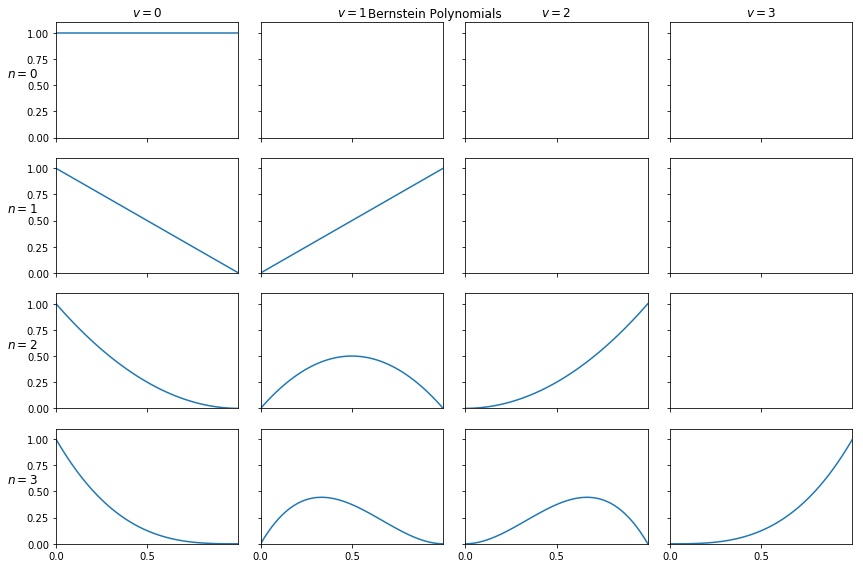

In [9]:
bernstein = lambda n, v, x: special.binom(n, v) * (x ** v) * ((1 - x) ** (n - v))
x = np.linspace(0, 1, 50)
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 8))
for ii in range(4):
    for jj in range(ii+1):
        axes[ii,jj].plot(x, bernstein(ii, jj, x))
        
cols = ['$v = {}$'.format(n) for n in range(0, 4)]
rows = ['$n = {}$'.format(v) for v in range(0, 4)]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

plt.xticks(np.arange(0, 1, step=0.5))
plt.suptitle("Bernstein Polynomials")
plt.axis([0, 1, 0, 1.1])
plt.tight_layout()
plt.show()

## Problem 3

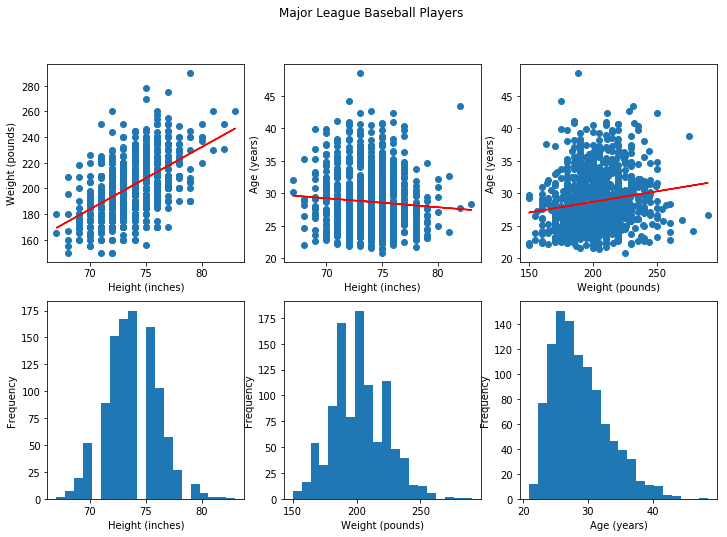

In [10]:
MLB = np.load("MLB.npy");
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0,0].scatter(MLB[:,0], MLB[:,1])
axes[0,0].set_xlabel("Height (inches)")
axes[0,0].set_ylabel("Weight (pounds)")
slope, intercept, r_value, p_value, std_err = stats.linregress(MLB[:,0], MLB[:,1])
axes[0,0].plot(MLB[:,0], intercept + slope*MLB[:,0], 'r', label='fitted line')

axes[0,1].scatter(MLB[:,0], MLB[:,2])
axes[0,1].set_xlabel("Height (inches)")
axes[0,1].set_ylabel("Age (years)")
slope, intercept, r_value, p_value, std_err = stats.linregress(MLB[:,0], MLB[:,2])
axes[0,1].plot(MLB[:,0], intercept + slope*MLB[:,0], 'r', label='fitted line')

axes[0,2].scatter(MLB[:,1], MLB[:,2])
axes[0,2].set_xlabel("Weight (pounds)")
axes[0,2].set_ylabel("Age (years)")
slope, intercept, r_value, p_value, std_err = stats.linregress(MLB[:,1], MLB[:,2])
axes[0,2].plot(MLB[:,1], intercept + slope*MLB[:,1], 'r', label='fitted line')

axes[1,0].hist(MLB[:,0], bins=20);
axes[1,0].set_xlabel("Height (inches)")
axes[1,0].set_ylabel("Frequency")
axes[1,1].hist(MLB[:,1], bins=20);
axes[1,1].set_xlabel("Weight (pounds)")
axes[1,1].set_ylabel("Frequency")
axes[1,2].hist(MLB[:,2], bins=20);
axes[1,2].set_xlabel("Age (years)")
axes[1,2].set_ylabel("Frequency")

plt.suptitle("Major League Baseball Players")
#plt.tight_layout()
plt.show()

## Problem 4 [[Incomplete]]

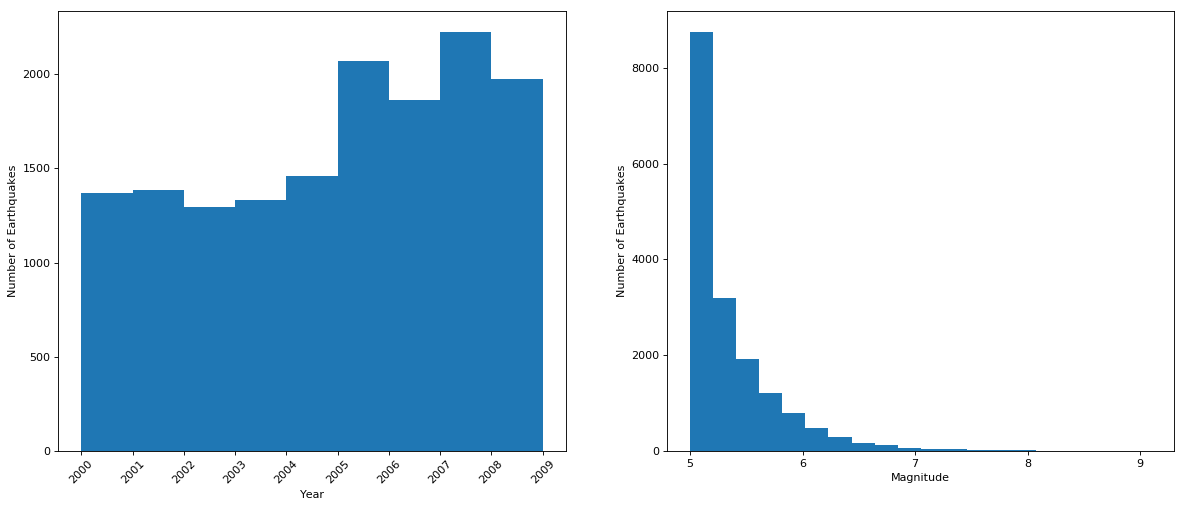

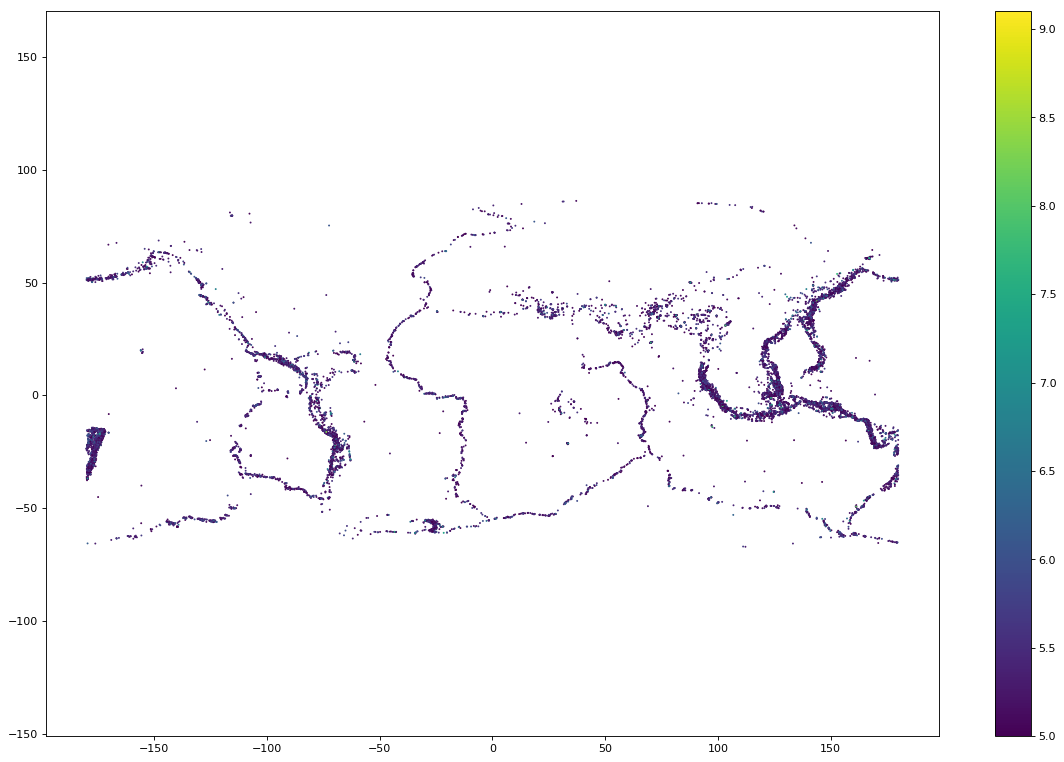

In [55]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
#ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# How many earthquakes happened every year? Make a histogram!
years = np.arange(2000, 2010, 1)

ax1.hist(year, bins=years);
ax1.set_xticks(years);
ax1.set_xticklabels(years, rotation=45);
ax1.set_xlabel("Year");
ax1.set_ylabel("Number of Earthquakes");

# How often do stronger earthquakes happen compared to weaker ones? 
# Make a histogram!
ax2.hist(magnitude, bins=20);
ax2.set_xlabel("Magnitude");
ax2.set_ylabel("Number of Earthquakes");

# Where do earthquakes happen? Scatter latitude and longitude of the quakes.
# ax3.scatter(longitude, latitude, s=.5, c=magnitude, cmap='viridis')
# ### ADD COLORBAR SOMEHOW
# # cax = ax3.pcolormesh(longitude, latitude, magnitude, cmap="magma")
# # fig.colorbar(cax, ax=ax3)
# ax3.set_aspect("equal")
# ax3.set_xlabel("Longitude")
# ax3.set_ylabel("Latitude")
# plt.tight_layout()
# plt.show()

fig=plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(longitude, latitude, s=.5, c=magnitude, cmap='viridis')
plt.colorbar();
plt.axis("equal")

plt.show()

## Problem 5

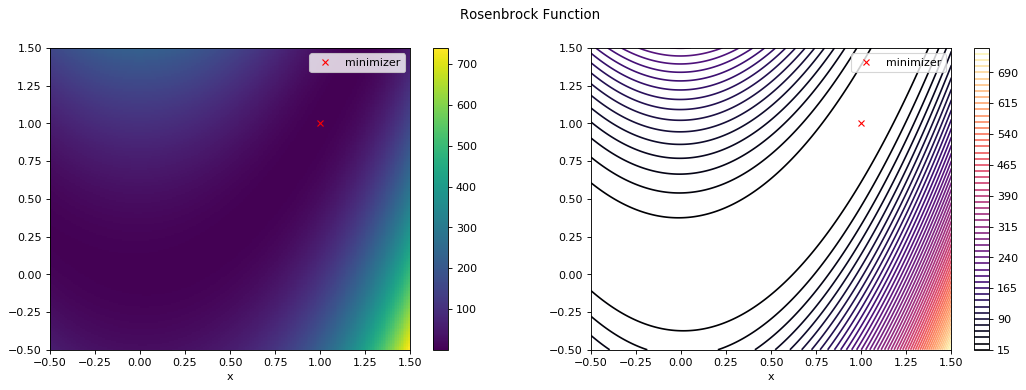

In [12]:
rosenbrock = lambda x, y: (1 - x)**2 + 100 * (y - x**2)**2
x = np.linspace(-.5, 1.5, 200)
X, Y = np.meshgrid(x, x)
Z = rosenbrock(X, Y)

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121)
ax = plt.gca()
plt.pcolormesh(X, Y, Z, cmap="viridis") # Heat map.
plt.colorbar()
point = pd.DataFrame({'x': [1], 'y': [1]})
point.plot(x='x', y='y', ax=ax, style='rx', label='minimizer')

plt.subplot(122)
ax = plt.gca()
plt.contour(X, Y, Z, 50, cmap="magma") # Contour map.
point.plot(x='x', y='y', ax=ax, style='rx', label='minimizer')
plt.colorbar()

plt.suptitle("Rosenbrock Function")

plt.show()

## Problem 6

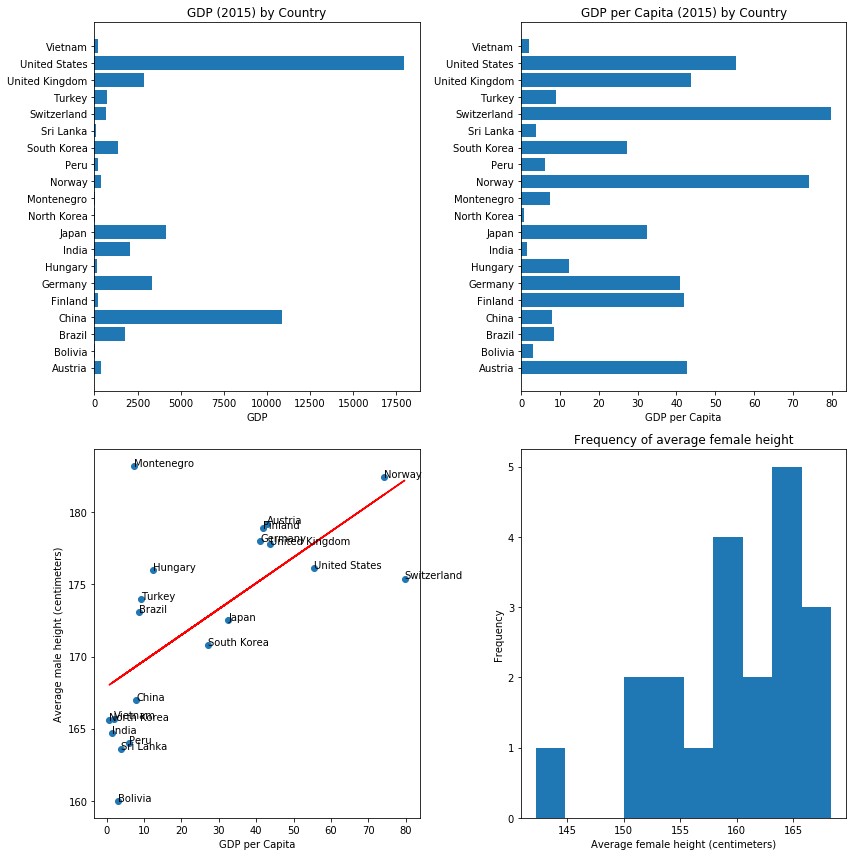

In [13]:
pop, gdp, maleH, femaleH = np.load("countries.npy").T
countries = ["Austria", "Bolivia", "Brazil", "China",
             "Finland", "Germany", "Hungary", "India",
             "Japan", "North Korea", "Montenegro", "Norway",
             "Peru", "South Korea", "Sri Lanka", "Switzerland",
             "Turkey", "United Kingdom", "United States", "Vietnam"]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Horizontal bar chart of GDP
positions = np.arange(len(countries))
axes[0,0].barh(positions, gdp, align="center")
axes[0,0].set_yticks(positions)
axes[0,0].set_yticklabels(countries)
axes[0,0].set_xlabel("GDP")
axes[0,0].set_title("GDP (2015) by Country")

# Horiztonal bar chart of gdp per capita
axes[0,1].barh(positions, gdp/pop, align="center")
axes[0,1].set_yticks(positions)
axes[0,1].set_yticklabels(countries)
axes[0,1].set_xlabel("GDP per Capita")
axes[0,1].set_title("GDP per Capita (2015) by Country")

# Scatter plot of gdp per capita and average male height
axes[1,0].scatter(gdp/pop, maleH)
for ii, name in enumerate(countries):
    axes[1,0].annotate(name, (gdp[ii]/pop[ii],maleH[ii]))
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp/pop, maleH)
axes[1,0].plot(gdp/pop, intercept + slope*(gdp/pop), 'r', label='fitted line')
axes[1,0].set_xlabel("GDP per Capita")
axes[1,0].set_ylabel("Average male height (centimeters)")
    
# Histogram of average female height
axes[1,1].hist(femaleH, bins=10)
axes[1,1].set_title("Frequency of average female height")
axes[1,1].set_xlabel("Average female height (centimeters)")
axes[1,1].set_ylabel("Frequency")
    
plt.tight_layout()
plt.show()

Top two plots: Observe that while some countries may seem to have a low GDP, their GDP per capita may actually be relatively high (i.e. Austria), while the reverse is also true (i.e. China).

In the lower left plot, observe that there is a positive relationship between GDP per capita and average male height. 

In the lower right histogram, observe that most countries have a similar average female height, but there is one outlier. 

## Lab 7: Pandas 1: Introduction

## Problem 1

In [14]:
s1 = pd.Series(np.array([x**2 - 1 for x in np.arange(0,51,2)]) , index=np.arange(0,51,2))
s1[np.array([i % 3 == 0 for i in s1.index])] = 0
s1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

## Problem 2

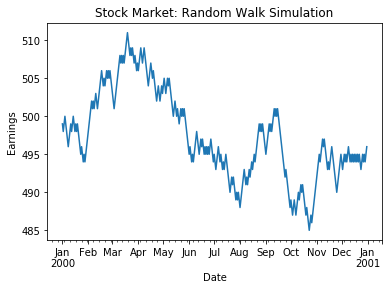

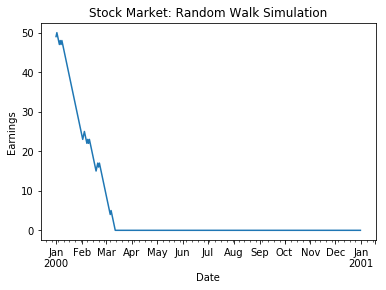

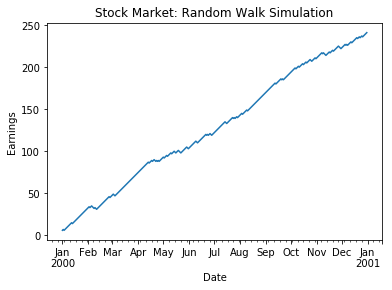

In [15]:
def random_stock(p, d=100):
    # create an index of days
    days = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    # make one draw each day from Bernoulli distribution
    draws = np.random.binomial(1, p, size=len(days))
    # replace 0 (a loss) with -1
    draws[draws == 0] = -1
    # create series with the results of the draws, index by days
    s = pd.Series(draws, index=days)
    # add initial money to day 0
    s[0] = s[0] + d
    
    s = s.cumsum()
    
    # replace negative values with 0
    s[s < 0] = 0
    
    s.plot()
    plt.ylabel("Earnings")
    plt.xlabel("Date")
    plt.title("Stock Market: Random Walk Simulation")
    plt.show()
    
random_stock(.5, 500)
random_stock(.2, 50)
random_stock(.8, 5)

## Problem 3

In [16]:
# toy data for problems 3 and 4
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [17]:
# SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4

In [18]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], otherInfo, on='ID')[['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


## Problem 5

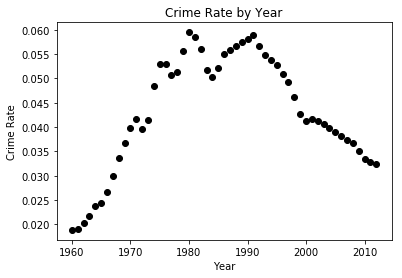

5 years with the highest crime rate (in descending order):

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Crime-Rate, dtype: float64

Average number of total crimes between 1960 and 2012: 10638068.08
Average number of burglaries between 1960 and 2012: 2446286.21

Years for which the total number of crimes was below average, but the number of burglaries was above average:
[1973, 1974]


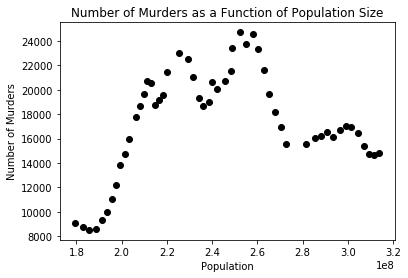

In [19]:
# read in data
crime = pd.read_csv('crime_data.txt', sep=",", index_col=0, header=1)

# calculate crime rate
crime["Crime-Rate"] = crime["Total"] / crime["Population"]

# plot the crime rate as a function of the year
plt.plot(crime.index, crime["Crime-Rate"], 'ko')
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.title("Crime Rate by Year")
plt.show()

# list 5 years with the highest crime rate, in descending order
print("5 years with the highest crime rate (in descending order):\n")
print(crime["Crime-Rate"].nlargest(5))

# calculate the average number of total crimes as well as 
# burglary crimes between 1960 and 2012
averageTotal = crime["Total"].mean()
averageBurg = crime["Burglary"].mean()
print("\nAverage number of total crimes between 1960 and 2012: " 
     + str(round(averageTotal, 2)) +
      "\nAverage number of burglaries between 1960 and 2012: "
     + str(round(averageBurg, 2)))

# find the years for which the total number of crimes was below average, 
# but the number of burglaries was above average.
years = crime.index[(crime["Total"] < averageTotal) & (crime["Burglary"] > averageBurg)].tolist()
print("\nYears for which the total number of crimes was below average, but the number of burglaries was above average:\n" 
     + str(years))

# plot the number of murders as a function of the population.
plt.plot(crime["Population"], crime["Murder"], 'ko')
plt.xlabel("Population")
plt.ylabel("Number of Murders")
plt.title("Number of Murders as a Function of Population Size")
plt.show()

# Select the Population, Violent, and Robbery columns for all years in the 1980s, 
# and save this smaller data frame to a CSV ﬁle crime_subset.csv.
sub_crimes = crime[(crime.index >= 1980) & (crime.index <= 1989)][["Population", "Violent", "Robbery"]] 
sub_crimes.to_csv("crime_subset.csv")


## Problem 6

In [20]:
# import titanic dataset
# titanic = data('titanic')
# Nevermind, the imported dataset doesn't seem to have all the required 
# data for this question. I'll instead used the csv file from the 2017
# repository.

titanic = pd.read_csv('titanic.csv', sep=",", header=0)

titanic = titanic.drop(columns=["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"])

titanic = titanic.dropna(subset=["Survived"])

titanic.loc[titanic["Survived"] == 1, "Survived"] = True
titanic.loc[titanic["Survived"] == 0, "Survived"] = False

averageAge = titanic["Age"].mean()
titanic["Age"] = titanic["Age"].fillna(averageAge)

titanic.to_csv("titanic_clean.csv")

titanic

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.000000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.916700,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.000000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,113781,151.5500,S
5,1.0,True,"Anderson, Mr. Harry",male,48.000000,19952,26.5500,S
6,1.0,True,"Andrews, Miss. Kornelia Theodosia",female,63.000000,13502,77.9583,S
7,1.0,False,"Andrews, Mr. Thomas Jr",male,39.000000,112050,0.0000,S
8,1.0,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,11769,51.4792,S
9,1.0,False,"Artagaveytia, Mr. Ramon",male,71.000000,PC 17609,49.5042,C


In [21]:
numSurvive = sum(titanic["Survived"] == True)
percentSurvive = numSurvive / (len(titanic))
aveTicketPrice = titanic["Fare"].mean()
maxTicketPrice = max(titanic["Fare"])

oldestSurvivor = np.max(titanic["Age"].where(titanic["Survived"] == True))
youngestSurvivor = np.min(titanic["Age"].where(titanic["Survived"] == True))
oldestDeath = np.max(titanic["Age"].where(titanic["Survived"] == False))
youngestDeath = np.min(titanic["Age"].where(titanic["Survived"] == False))

print("Number of people survived: " + str(numSurvive)
     +"\nPercentage of passengers survived: " + str(round(percentSurvive, 2) * 100)
     +"\nAverage ticket price: " + str(round(aveTicketPrice, 2))
     +"\nMost expensive ticket price: " + str(round(maxTicketPrice, 2))
     +"\nOldest survivor: " + str(oldestSurvivor)
     +"\nYoungest survivor: " + str(youngestSurvivor)
     +"\nOldest death: " + str(oldestDeath)
     +"\nYoungest death: " + str(youngestDeath))

Number of people survived: 500
Percentage of passengers survived: 38.0
Average ticket price: 33.3
Most expensive ticket price: 512.33
Oldest survivor: 80.0
Youngest survivor: 0.1667
Oldest death: 74.0
Youngest death: 0.3333


## Lab 8: Pandas 2: Plotting

## Problem 1

### Data set 1: birthdeathrates

Source: J. A. Hartigan (1975), _Clustering Algorithms_. John Wiley & Sons, New York.

In [22]:
bdrates = data('birthdeathrates')
# Rename columns
bdrates = bdrates.rename(index=str, columns={"birth": "Birth rate", "death": "Death rate"})

In [23]:
bdrates.head()

,Birth rate,Death rate
alg,36.4,14.6
con,37.3,8.0
egy,42.1,15.3
gha,55.8,25.6
ict,56.1,33.1


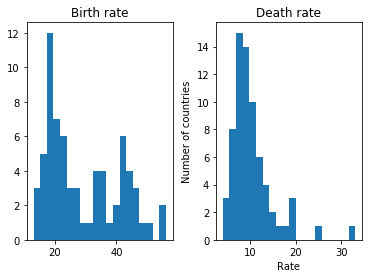

In [24]:
bdrates[["Birth rate", "Death rate"]].hist(grid=False, bins=20)
plt.xlabel("Rate")
plt.ylabel("Number of countries")
plt.show()

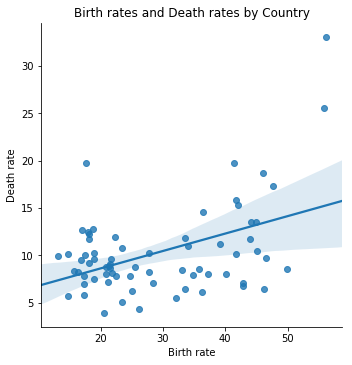

In [25]:
sns.lmplot(x='Birth rate',y='Death rate',data=bdrates,fit_reg=True) 
plt.xlabel("Birth rate")
plt.ylabel("Death rate")
plt.title("Birth rates and Death rates by Country")
plt.show()

### Data set 2: lung

Source: 
Loprinzi CL. Laurie JA. Wieand HS. Krook JE. Novotny PJ. Kugler JW. Bartel J.
Law M. Bateman M. Klatt NE. et al. Prospective evaluation of prognostic
variables from patient-completed questionnaires. North Central Cancer
Treatment Group. Journal of Clinical Oncology. 12(3):601-7, 1994.

In [26]:
lung = data('lung')
# Rename sex variable
lung.loc[lung["sex"] == 1, "sex"] = "Male"
lung.loc[lung["sex"] == 2, "sex"] = "Female"
lung.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,Male,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,Male,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,Male,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,Male,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,Male,0.0,100.0,90.0,NaN,0.0


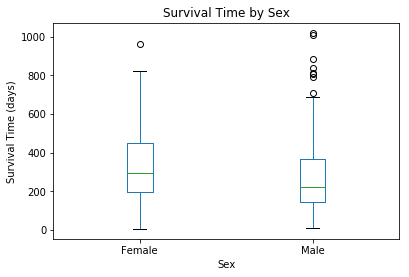

In [27]:
sexes = lung.groupby("sex")
lung.boxplot(["time"], by="sex", grid=False)
plt.title("Survival Time by Sex")
plt.ylabel("Survival Time (days)")
plt.xlabel("Sex")
plt.suptitle("")
plt.show()

Females appear to have a slightly higher median survival time than men. Furthermore, the quartiles of the distribution of survival time for women appear to all be higher than those for men.

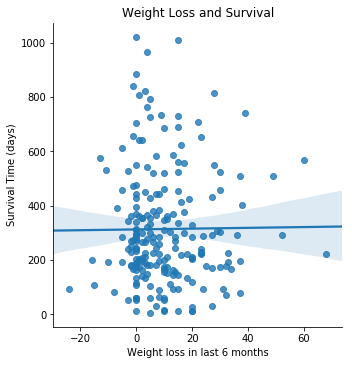

In [28]:
sns.lmplot(x='wt.loss',y='time',data=lung,fit_reg=True) 
plt.xlabel("Weight loss in last 6 months")
plt.ylabel("Survival Time (days)")
plt.title("Weight Loss and Survival")
plt.show()

There appears to be no correlation between weight loss in the last 6 months and surival time.

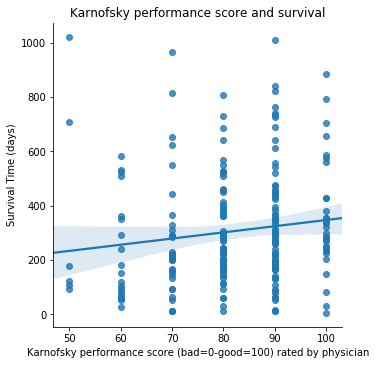

In [29]:
sns.lmplot(x='ph.karno',y='time',data=lung,fit_reg=True) 
plt.xlabel("Karnofsky performance score (bad=0-good=100) rated by physician")
plt.ylabel("Survival Time (days)")
plt.title("Karnofsky performance score and survival")
plt.show()

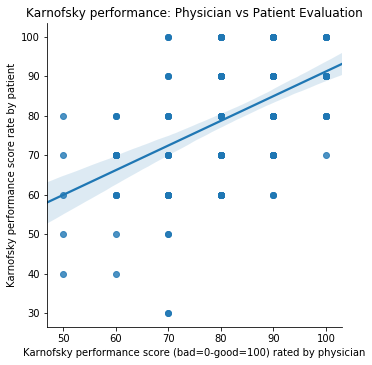

In [30]:
sns.lmplot(x='ph.karno',y='pat.karno',data=lung,fit_reg=True) 
plt.xlabel("Karnofsky performance score (bad=0-good=100) rated by physician")
plt.ylabel("Karnofsky performance score rate by patient")
plt.title("Karnofsky performance: Physician vs Patient Evaluation")
plt.show()

### Data set 3: birthwt

Source: Hosmer, D.W. and Lemeshow, S. (1989) Applied Logistic Regression. New York:
Wiley

In [31]:
birthwt = data('birthwt')
# Rename race variable
birthwt.loc[birthwt["race"] == 1, "race"] = "White"
birthwt.loc[birthwt["race"] == 2, "race"] = "Black"
birthwt.loc[birthwt["race"] == 3, "race"] = "Other"

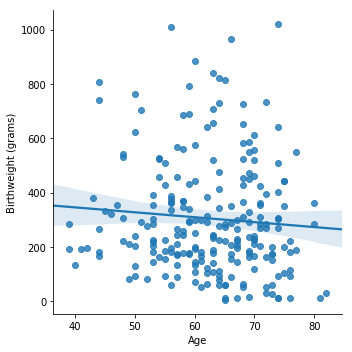

In [32]:
sns.lmplot(x='age',y='time',data=lung,fit_reg=True) 
plt.xlabel("Age")
plt.ylabel("Birthweight (grams)")
plt.show()

There does not appear to be a strong relationship between age and birthweight. Additionally, there appears to be evidence of heteroskedasticity.

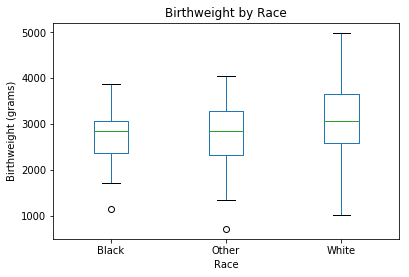

In [33]:
race = birthwt.groupby("race")
birthwt.boxplot(["bwt"], by="race", grid=False)
plt.title("Birthweight by Race")
plt.ylabel("Birthweight (grams)")
plt.xlabel("Race")
plt.suptitle("")
plt.show()

The median birthweight between the three 3 different race categories appears to be very similar. However, the 25th percentile appears to be higher for whites than other and blacks.

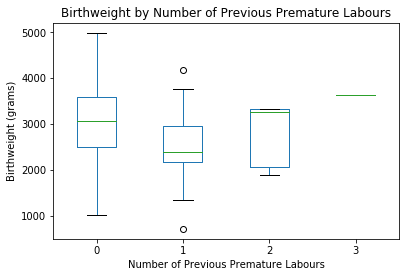

In [34]:
race = birthwt.groupby("ptl")
birthwt.boxplot(["bwt"], by="ptl", grid=False)
plt.title("Birthweight by Number of Previous Premature Labours")
plt.xlabel("Number of Previous Premature Labours")
plt.ylabel("Birthweight (grams)")
plt.suptitle("")
plt.show()

The median birthweight for women with 2 or 3 prior premature labors is higher than women with 0 or 1 premature labors.

### Data Set 4: Arbuthnot

Source: Arbuthnot, John (1710). "An argument for Devine Providence, taken from the
constant Regularity observ'd in the Births of both Sexes," _Philosophical
transactions_, 27, 186-190. Published in 1711.

In [35]:
arb = data("Arbuthnot")
# Change index to year
arb.index= arb["Year"]

In [36]:
arb.head()

,Year,Males,Females,Plague,Mortality,Ratio,Total
Year,,,,,,,
1629,1629,5218,4683,0,8771,1.114243,9.901
1630,1630,4858,4457,1317,10554,1.089971,9.315
1631,1631,4422,4102,274,8562,1.078011,8.524
1632,1632,4994,4590,8,9535,1.088017,9.584
1633,1633,5158,4839,0,8393,1.065923,9.997


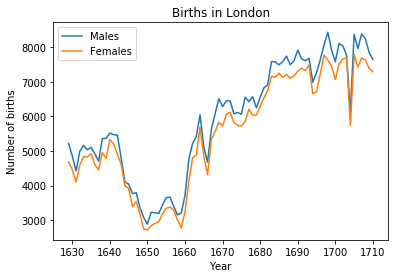

In [37]:
arb.plot(y=["Males", "Females"])
plt.ylabel("Number of births")
plt.title("Births in London")
plt.show()

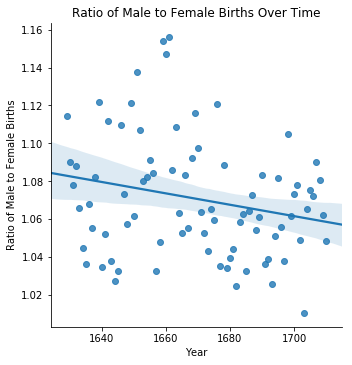

In [38]:
sns.lmplot(x='Year',y='Ratio',data=arb,fit_reg=True) 
plt.xlabel("Year")
plt.ylabel("Ratio of Male to Female Births")
plt.title("Ratio of Male to Female Births Over Time")
plt.show()

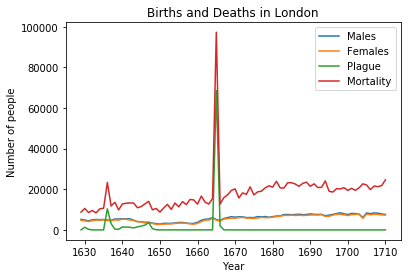

In [39]:
arb.plot(y=["Males", "Females", "Plague", "Mortality"])
plt.ylabel("Number of people")
plt.title("Births and Deaths in London")
plt.show()

### Data set 5: road

Source: Imperial College, London M.Sc. exercise

In [40]:
road = data('road')

In [41]:
road.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


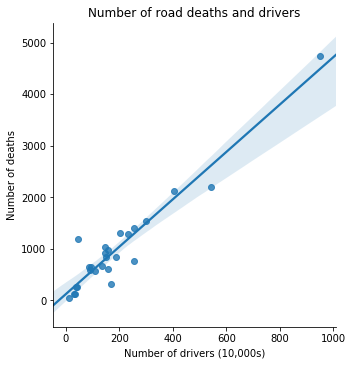

In [42]:
sns.lmplot(x='drivers',y='deaths',data=road,fit_reg=True) 
plt.xlabel("Number of drivers (10,000s)")
plt.ylabel("Number of deaths")
plt.title("Number of road deaths and drivers")
plt.show()

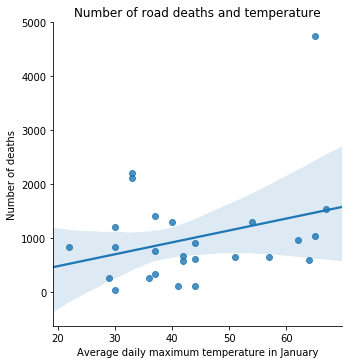

In [43]:
sns.lmplot(x='temp',y='deaths',data=road,fit_reg=True) 
plt.xlabel("Average daily maximum temperature in January")
plt.ylabel("Number of deaths")
plt.title("Number of road deaths and temperature")
plt.show()

## Lab 9: Pandas 3: Grouping

### Problem 1

### Iris

Text(0.5,1,'Measurements of Species of Iris')

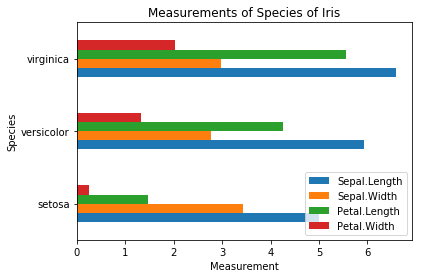

In [44]:
iris = data('iris')
species = iris.groupby("Species")
species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind="barh")
plt.xlabel("Measurement")
plt.title("Measurements of Species of Iris")

From the above bar graph, we can clearly see that the viriginca and versicolor species have very similar measurements. However, the setosa species has a much smaller average petal width. Therefore, we can distinguish the setosa species from the others by examining the flower's petal width.

Given iris data without a species label, we can exploit machine/statistical learning methods (classification) to identify the flower's species. For instance, creating a neural network might be useful here.

More naively, we could first examine the petal width. If this width were close to zero, we could perhaps classifly the flower as setosa. If not, we could then narrow down the potential species to versicolor and virginica. We could then look at the petal length. We would then classify a flower with a shorter petal length as versicolor. But this method is very crude, and something like a neural network would do much better.

### Poisons

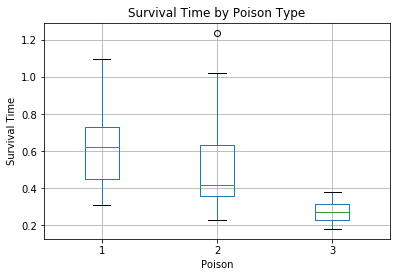

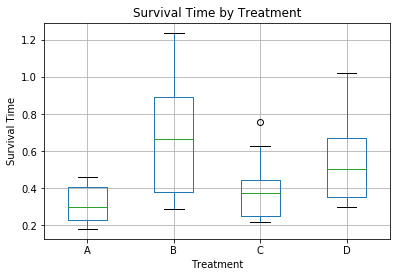

In [45]:
poisons = data('poisons')
poisons.boxplot(["time"], by="poison")
plt.xlabel("Poison")
plt.ylabel("Survival Time")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.title("Survival Time by Poison Type")
plt.show()

poisons.boxplot(["time"], by="treat")
plt.xlabel("Treatment")
plt.ylabel("Survival Time")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.title("Survival Time by Treatment")
plt.show()

By the first plot, observe that poison 1 is generally the most deadly. By the second plot, across all poisons, treatment B appears most effective.

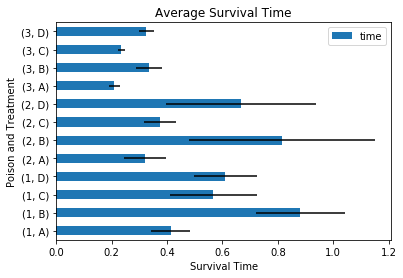

In [46]:
types = poisons.groupby(["poison", "treat"])
types[["time"]].mean().plot(kind="barh", xerr=types.std(), title="Average Survival Time")
plt.xlabel("Survival Time")
plt.ylabel("Poison and Treatment")
plt.show()

If I were poisoned without knowing which poison, I would choose treatment B because it has the highest average survival time. However, if I did know which poison, I would update my beliefs with this new information and choose the treatment with the highest average survival time for that particular poison.

We can get this information from the bar graph above. For poison 1, treatment B has the highest average survival time. Similarly, treatment B has the highest average survival time for poison 2. However, for poison 3, the average survival time for treatments B and D are very similar, but B is slightly higher. Thus, I would still choose treatment B for all poisons.

### Diamonds

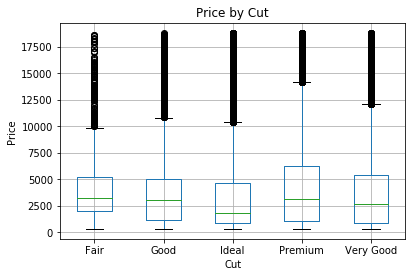

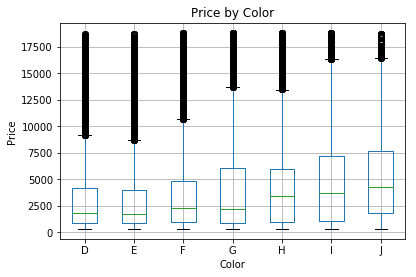

In [47]:
diamonds = data("diamonds")
diamonds.head()
diamonds.boxplot(["price"], by="cut")
plt.xlabel("Cut")
plt.ylabel("Price")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.title("Price by Cut")
plt.show()

diamonds.boxplot(["price"], by="color")
plt.xlabel("Color")
plt.ylabel("Price")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.title("Price by Color")
plt.show()

By the above boxplots, observe that the cut of a diamond as heterogenous effects on its price. For instance, diamonds with fair cut are priced higher, on average, than those with ideal cuts. However, the color of a diamond appears to be increasing in the color index (alphabetically). 

Observe that there are many other factors outside of cut and color that can effect a diamond's price. For instance, the above boxplots do not control for size/carat/etc. Controlling for these factors could help unexplain discrepancies. 

### Problem 2

In [48]:
titanic = pd.read_csv('titanic.csv', sep=",", header=0)
print("Survival rates by embarked:\n")
print(titanic.pivot_table(values="Survived", index="Embarked"))

print("\nSurvival rates by embarked and gender:\n")
print(titanic.pivot_table(values="Survived", index="Embarked", columns="Sex"))

Survival rates by embarked:

          Survived
Embarked          
C         0.555556
Q         0.357724
S         0.332604

Survival rates by embarked and gender:

Sex         female      male
Embarked                    
C         0.902655  0.305732
Q         0.616667  0.111111
S         0.680412  0.170144


The different categories of embarked stand for C = Cherbourg, Q = Queenstown, S = Southampton. The above table shows that people who embarked from Cherbourg were much more likely to survive. Perhaps this implies that those from Cherbourg resided in a different part of the ship that was easier to escape from or had more lifeboats.

In [49]:
print("\nSurvival rates by embarked, gender, and fare:\n")
fare = pd.qcut(titanic["Fare"], 3)
print(titanic.pivot_table(values="Survived", index=["Embarked", fare], columns="Sex"))

print("\nSurvival rates by embarked, gender, and age:\n")
age = pd.cut(titanic['Age'], [0, 12, 18, 80])
print(titanic.pivot_table(values="Survived", index=["Embarked", age], columns="Sex"))


Survival rates by embarked, gender, and fare:

Sex                         female      male
Embarked Fare                               
C        (26.0, 512.329]  1.000000  0.140000
         (-0.001, 8.662]  0.678571  0.382353
         (8.662, 26.0]    0.974026  0.383562
Q        (26.0, 512.329]  0.565217  0.133333
         (-0.001, 8.662]  0.818182  0.083333
         (8.662, 26.0]    0.666667  0.000000
S        (26.0, 512.329]  0.463415  0.128788
         (-0.001, 8.662]  0.656934  0.140777
         (8.662, 26.0]    0.787611  0.282895

Survival rates by embarked, gender, and age:

Sex                  female      male
Embarked Age                         
C        (18, 80]  0.888889  0.714286
         (0, 12]   0.800000  0.333333
         (12, 18]  0.959459  0.336634
Q        (18, 80]       NaN  0.000000
         (0, 12]   0.500000       NaN
         (12, 18]  0.444444  0.095238
S        (18, 80]  0.542857  0.578947
         (0, 12]   0.777778  0.066667
         (12, 18]  0.732673  0

Perhaps surprisingly, those females who embarked from Q and S with the most expensive tickets were actually less likely to survive than those with less expensive tickets. Also observe that females were much more likely to survive, across all age ranges and ticket fares.

## Lab 10: Pandas 4: Time Series

### Problem 1

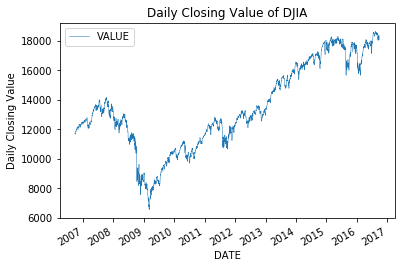

In [50]:
djia = pd.read_csv("DJIA.csv")
djia.index= pd.to_datetime(djia["DATE"], format="%Y-%m-%d")
djia = djia.drop(columns="DATE")
djia = djia[djia["VALUE"] != "."]
djia["VALUE"] = djia["VALUE"].apply(pd.to_numeric, errors='ignore')
djia.plot(y="VALUE", lw=.5)
plt.ylabel("Daily Closing Value")
plt.title("Daily Closing Value of DJIA")
plt.show()

### Problem 2 [[FIX]]

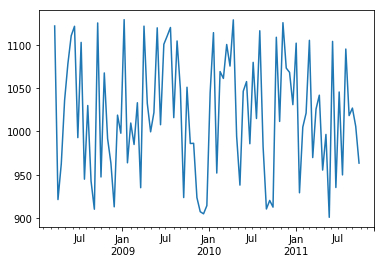

In [51]:
paychecks = pd.read_csv("paychecks.csv", squeeze=True, header=None)
paychecks.index = pd.date_range(start='2008/3/21', periods=93, freq="2W-FRI")
paychecks.plot()
plt.show()

### Problem 3

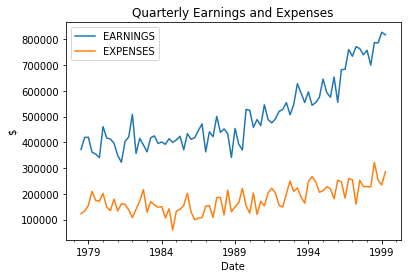

In [52]:
finances = pd.read_csv("finances.csv")
p = pd.period_range(start="1978-09", periods=len(finances), freq="Q-DEC")
finances.index = p
finances.plot()
plt.xlabel("Date")
plt.ylabel("$")
plt.title("Quarterly Earnings and Expenses")
plt.show()

### Problem 4

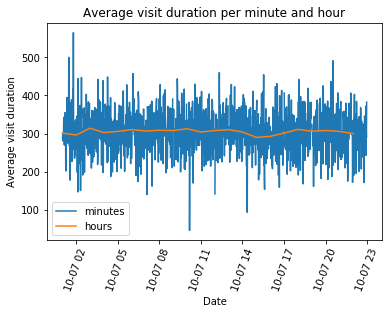

In [53]:
fig, ax = plt.subplots()
webTraf = pd.read_csv("website_traffic.csv")
webTraf["LEAVE"] = pd.to_datetime(webTraf["LEAVE"])
webTraf["ENTER"] = pd.to_datetime(webTraf["ENTER"])
webTraf["Duration"] = (webTraf["LEAVE"] - webTraf["ENTER"]).dt.seconds
minutes = webTraf.set_index('ENTER')['Duration']
ax.plot(minutes.resample('T').mean(), label="minutes")
hours = webTraf.set_index('ENTER')['Duration']
ax.plot(hours.resample('H').mean(), label="hours")
plt.legend()
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Average visit duration")
plt.title("Average visit duration per minute and hour")
plt.show()

### Problem 5

In [54]:
dayGains = djia.diff(periods=1) # gain/loss of each day

# Single day with the largest gain
print(dayGains["VALUE"].idxmax())

2008-10-13 00:00:00


In [55]:
# Single day with the largest lost
print(dayGains["VALUE"].idxmin())

2008-09-29 00:00:00


In [56]:
# group the data by month
months = djia.resample("M").first() # levels at the first day of each month
monthGains = months.diff() # gain/loss of each month 

# Month with the larget gain
print(monthGains["VALUE"].idxmax())

2015-11-30 00:00:00


In [57]:
# Month with the larget lost
print(monthGains["VALUE"].idxmin())

2015-09-30 00:00:00


### Problem 6

In [58]:
def plot_djia_window(s):

    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(djia, lw=.5)
    djia.rolling(window=s).mean().plot(color='r', lw=1, ax=ax)
    djia.rolling(window=s).min().plot(color='m', lw=1, ax=ax)
    djia.rolling(window=s).max().plot(color='y', lw=1, ax=ax)
    djia.ewm(span=s).mean().plot(color='g', lw=1, ax=ax)
    ax.legend(["Actual", "Rolling: Average", "Rolling: Minimum", "Rolling: Maximum", "Exponential"], loc="lower right")
    plt.title("DJIA: Rollling and EWM Functions, Window Span of %i" %s)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.show()

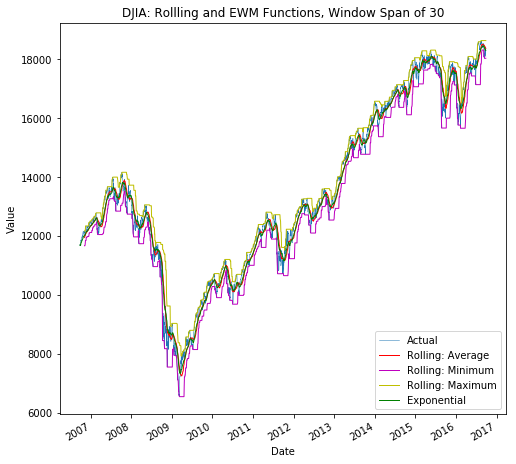

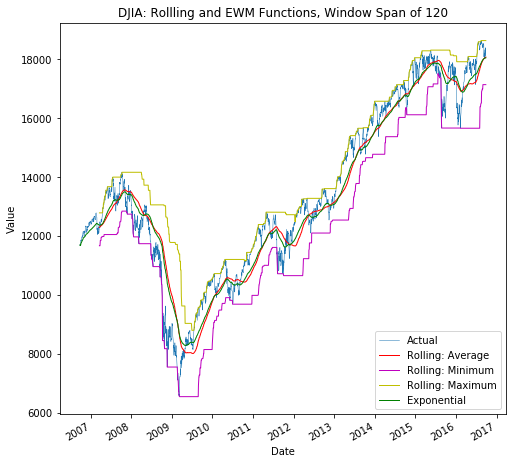

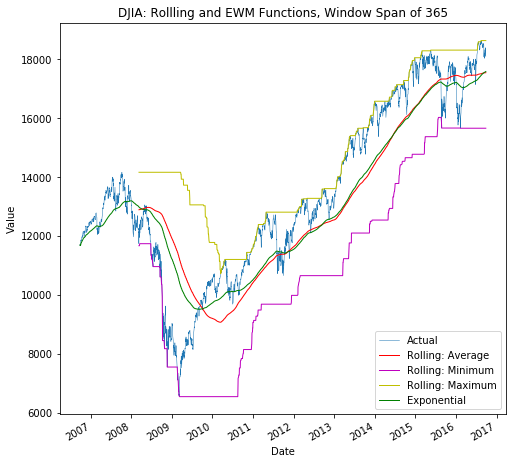

In [59]:
plot_djia_window(30)
plot_djia_window(120)
plot_djia_window(365)

By increasing the window, we consider more data when calculating the rolling window functions and EWM. Therefore, the smallest window most closely matches the data as it considers very nearby observations. However, as we increase the window, the functions deviate further from the actual data. We consider more observations in calculating the value of the function at a point, so the value will be generally be further off from the actual data. This is especially true of the rolling minimum and maximum functions.

## Exercise 7: A lifetime of temperatures

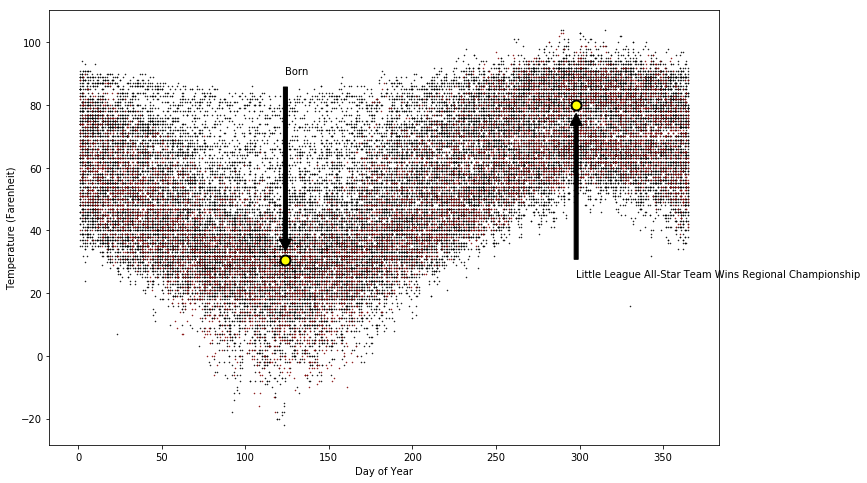

In [50]:
indianapolis = pd.read_csv("indianapolis.csv", index_col = 2)
miami = pd.read_csv("miami.csv", index_col = 2)
washingtondc = pd.read_csv("washingtondc.csv", index_col = 2)
chicago = pd.read_csv("chicago.csv", index_col = 2)
pittsburgh = pd.read_csv("pittsburgh.csv", index_col = 2)
cities = [indianapolis, miami, washingtondc, pittsburgh, chicago]

startDay = pd.to_datetime('1975-09-21').dayofyear

fig, ax = plt.subplots(figsize=(12,8))
for index, currentCity in enumerate(cities):
    # Convert index to a datetime object
    currentCity.index = pd.to_datetime(currentCity.index)
    # Find the ordinal day of the year
    currentCity['DayNum'] = currentCity.index.dayofyear
    
    currentCity['DayNum'] = np.where(currentCity['DayNum'] >= startDay, 
                                     currentCity['DayNum'] - startDay + 1, 
                                     366 + currentCity['DayNum'] - startDay)
    
    if index == 4:
        plt.scatter(currentCity['DayNum'], currentCity['TMAX'], c='#800000', linewidths=None, s=1/4)
        plt.scatter(currentCity['DayNum'], currentCity['TMIN'], c='#800000', linewidths=None, s=1/4)
    else:
        plt.scatter(currentCity['DayNum'], currentCity['TMAX'], c='black', linewidths=None, s=1/4)
        plt.scatter(currentCity['DayNum'], currentCity['TMIN'], c='black', linewidths=None, s=1/4)


born = (indianapolis.loc['1975-01-22','TMAX'] + indianapolis.loc['1975-01-22','TMIN']) / 2
league = (pittsburgh.loc['1988-07-14','TMAX'] + pittsburgh.loc['1988-07-14','TMIN']) / 2              
days = 366 + np.array([pd.to_datetime('1975-01-22').dayofyear, pd.to_datetime('1988-07-14').dayofyear]) - startDay

plt.plot(days, [born, league[0]], color='yellow', mec='black', mew=2, marker='o', ms=10, lw=0)           
plt.annotate('Born', xy=(days[0], born), xytext=(days[0], 90), 
                 arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('Little League All-Star Team Wins Regional Championship', 
             xy=(days[1],league[0]), xytext=(days[1], 25), 
                 arrowprops=dict(facecolor='black',shrink=0.05))
              
plt.ylabel('Temperature (Farenheit)')
plt.xlabel('Day of Year')
plt.savefig('images/life_temp.png', bbox_inches='tight')
plt.show()

In [36]:
league

DATE
1988-07-14    80.0
1988-07-14    82.5
1988-07-14    81.5
dtype: float64

## Exercise 8: 3D histogram

In [7]:
# read in data
lipids = pd.read_csv("lipids.csv", skiprows=4)
# only use observations from diseased individuals
lipids = lipids[lipids['diseased'] == 1]
lipids.head()

,diseased,chol,trig
51,1,184,145
52,1,263,142
53,1,185,115
54,1,271,128
55,1,173,56


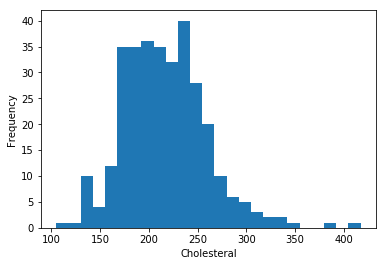

(229.8, 242.28]      40
(192.36, 204.84]     36
(179.88, 192.36]     35
(204.84, 217.32]     35
(167.4, 179.88]      35
(217.32, 229.8]      32
(242.28, 254.76]     28
(254.76, 267.24]     20
(154.92, 167.4]      12
(267.24, 279.72]     10
(129.96, 142.44]     10
(279.72, 292.2]       6
(292.2, 304.68]       5
(142.44, 154.92]      4
(304.68, 317.16]      3
(317.16, 329.64]      2
(329.64, 342.12]      2
(117.48, 129.96]      1
(404.52, 417.0]       1
(342.12, 354.6]       1
(379.56, 392.04]      1
(104.688, 117.48]     1
(392.04, 404.52]      0
(354.6, 367.08]       0
(367.08, 379.56]      0
Name: chol, dtype: int64

In [18]:
fig, ax = plt.subplots()
plt.hist(lipids["chol"], bins=25)
plt.xlabel("Cholesteral")
plt.ylabel("Frequency")
plt.show()

chol = pd.cut(lipids["chol"], 25)
pd.value_counts(chol)

Therefore, the midpoint of the bin with the highest frequency is 236.04.

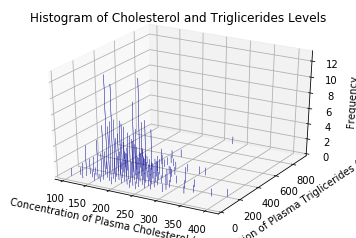

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(lipids['chol'], lipids['trig'], bins=25)

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b')

ax.set_xlabel('Concentration of Plasma Cholesterol (mg/dl)')
ax.set_ylabel('Concentration of Plasma Triglicerides (mg/dl)')
ax.set_zlabel('Frequency')

plt.title('Histogram of Cholesterol and Triglicerides Levels')
plt.savefig('images/3D_histogram.png', bbox_inches='tight')
plt.show()

plt.show()

With this histogram, we still observe a large number of individuals witth concentration of plasma near 250, but we also observe that individuals are clustered around specific values of concentration of plasma triglicerides (i.e. near 300). Thus, we observe how individuals have a range of concentration of plasma triglicerides.

The group with the highest risk for heart disease appearts to be those with concentration of plasma cholesterol from 250 to 250 and concentration of plasma triglicerides from 200 to 250 to 350.

## Exercise 9: Comparing segments of time series

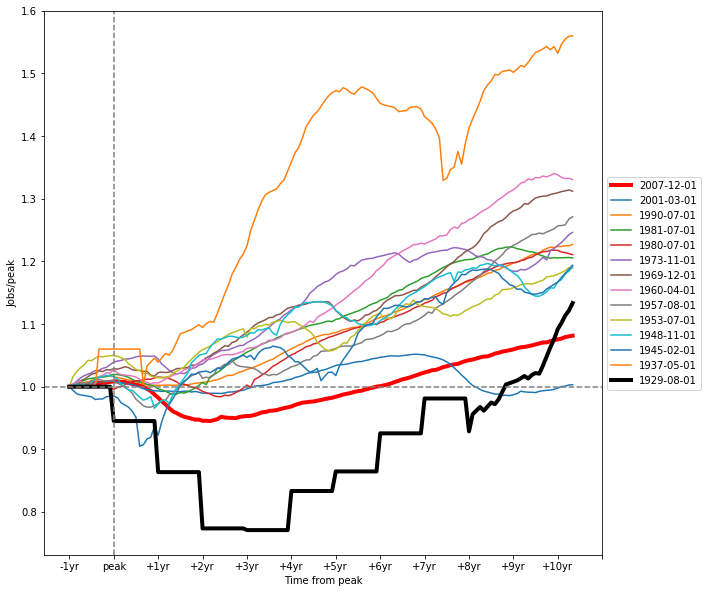

In [222]:
nonAgJobs = pd.read_csv("payems.csv")
# adjust scale
nonAgJobs['PAYEMS'] = nonAgJobs['PAYEMS'] * 1000
# set dates to index
nonAgJobs['DATE'] = pd.to_datetime(nonAgJobs['DATE'])
# until 1968, the the dates are off by 100 years
nonAgJobs.iloc[:358,0] = nonAgJobs.iloc[:358,0] - pd.DateOffset(years=100)
nonAgJobs = nonAgJobs.set_index('DATE')

# Start of the last 14 recessions
# Changed the months of the recessions beginning in 1937 and 1929 since 
# the data is only annual in this time period
recStart = np.array(['2007-12-01', '2001-03-01', '1990-07-01', '1981-07-01', 
                           '1980-07-01', '1973-11-01', '1969-12-01', '1960-04-01',
                           '1957-08-01', '1953-07-01', '1948-11-01', '1945-02-01',
                           '1937-07-01', '1929-07-01'], dtype ='datetime64')

# Add extra data for missing months
for ii in range(9):
    nonAgJobs = nonAgJobs.append([nonAgJobs.iloc[ii]]*11)
nonAgJobs = nonAgJobs.sort_index(axis=0)

jobGrowth = np.empty((14,137))
startid = []
# Get the index of the start of each recessiong
for ii in range(12):
    startid.append(nonAgJobs.index.get_loc(recStart[ii]))
    
startid.append(100)
startid.append(12)

for ii in range(14):
    jobGrowth[ii] = list(nonAgJobs.iloc[startid[ii]-12:startid[ii]+125, 0])
        
# Normalize each of the 14 series such that the jobs level at the peak date equals 1.
row_start = jobGrowth[:,0]
jobGrowth = jobGrowth / row_start[:,None]

# Plot each of the 14 series as a line plot (with no markers) on the same axes with 
# the peak jobs level of 1 on top of each other for each series.
fig, ax = plt.subplots(figsize = (10,10))
for ii in range(14):
    if ii == 0:
        plt.plot(jobGrowth[ii], 'r-', lw=4, label=recStart[ii])
    elif ii == 12:
        plt.plot(jobGrowth[ii], label='1937-05-01')
    elif ii == 13:
        plt.plot(jobGrowth[ii], 'k-', lw=4, label='1929-08-01')
    else:
        plt.plot(jobGrowth[ii], label=recStart[ii])
        
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Jobs/peak")
plt.xlabel("Time from peak")
labels = ['-1yr', 'peak', '+1yr', '+2yr', '+3yr', '+4yr',
          '+5yr', '+6yr', '+7yr', '+8yr', '+9yr', '+10yr']
plt.xticks(np.arange(0, 145, 12), labels)

x = np.linspace(0, 145, 144)
ax.axhline(1, ls='--', linewidth=1.5, color='grey')
ax.axvline(12, ls='--', linewidth=1.5, color='grey')
plt.show()

As seen above, the Great Depressions did hit the lowest level of jobs relative to the peak out of the recessions considered here. However, other recessions may have been worse in terms of recovery. 

The Great Recession appears to have a slower recovery because 10 years past the peak, we have fewer jobs relative to the recovery after the Great Depression.